In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from helper import dataset

train_path = '/home/zeus/Code/Arm-Sim/dataset/trainset.csv'
test_path = '/home/zeus/Code/Arm-Sim/dataset/testset.csv'

In [27]:
# X = coordinates, Y = Joint Angles 

train_X, train_Y = dataset(train_path)
test_X, test_Y = dataset(test_path)

# print(test_X[0:5])
test_Y[0:5]

[[17, 25, 8, 83, 651],
 [28, 88, 83, -3, 608],
 [25, 38, 75, 53, 650],
 [118, 3, 63, 79, 577],
 [137, 67, -20, 28, 444]]

In [29]:
model = LinearRegression()
model.fit(train_X, train_Y)
# model.score(train_X, train_Y)
pred = model.predict(test_X)

mse_train = mean_squared_error(train_Y[0:500], pred, squared=False)
mse_test = mean_squared_error(test_Y, pred, squared=False)

print(mse_train)
print(mse_test)

58.176559660831664
43.22817689219938


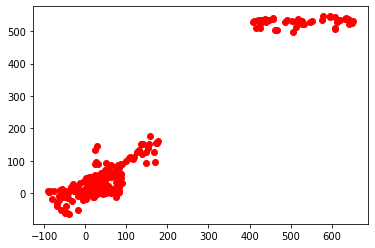

In [30]:
import matplotlib.pyplot as plt

plt.scatter(test_Y[0:50], pred[0:50], color='red')
# plt.plot(test_Y, pred, color='blue', linewidth=3)

plt.show()

In [31]:
#__________________DL________________________________
import torch
import torch.nn as nn
import torch.optim as optim

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()

        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 5)

    def forward(self, t):
        t = nn.ReLU(self.fc1(t))
        t = nn.ReLU(self.fc2(t))
        t = nn.Tanh(self.fc3(t))

        return t

model = NN()
optimizer = optim.Adam(model.parameters(), lr=0.01)


